# Lab02: Analysis of Coupled Noises on PCB

Due: Febuary 5, 2019

Author: Kevin Egedy

#### Objectives


This lab is to introduce the characteristics of backward and forward coupled noises on
coupled transmission lines. You will also study how to obtain the coupling coefficients
and lumped element models from the measured data. 

In [1]:
# Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
files = [
    'LineACh1Reflection_OPEN_2ns_30nsOffset',
    'LineAChA_500ps_41.750nsoff',
    'LineAChA_OPEN_500ps_41.75nsOffset',
    'LineAChB_500ps_41.952nsoff',
    'LineAChB_OPEN_500ps_41.75nsOffset',
    'LineAReflection_2ns_31.6nsoff',
    'LineBCh1Reflection_OPEN_2ns_30nsOffset',
    'LineBChA1080ps41.0184nsoff',
    'LineBChA_OPEN_500ps_41',
    'LineBChB600ps41.952nsoff',
    'LineBChB_OPEN_500ps_41.75nsOffset',
    'LineBReflection1200ps33.9808nsoff',
    'LineCCh1Reflection_OPEN_2ns_30nsOffset',
    'LineCchA_490ps_41.38ns',
    'LineCChA_OPEN_500ps_41.75nsOffset',
    'LineCchB_430ps_42nsOff',
    'LineCChB_OPEN_500ps_41.75nsOffset',
    'LineCReflection_2.4ns_30.91nsOff'
]

In [3]:
# Read .xlsx files and convert them into .csv
#
for filename in files:
    df = pd.read_excel(f'data/{filename}.xlsx',header=None,nrows=1)
    with open(f'data/csv/{filename}.csv','w+') as f0: f0.write(df.T.to_csv(index=False,header=None));

36533

35972

35655

37061

35752

36263

36477

35565

35882

36944

35788

35812

36441

35923

35661

36761

35624

36283

In [4]:
# Read .csv files into numpy arrays
#
LineACh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineACh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineAChA_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChA_500ps_41.750nsoff.csv',header=None).to_numpy()

LineAChA_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChA_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineAChB_500ps_41952nsOffset = \
  pd.read_csv('data/csv/LineAChB_500ps_41.952nsoff.csv',header=None).to_numpy()

LineAChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineAChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineAReflection_2ns_316nsOffset = \
  pd.read_csv('data/csv/LineAReflection_2ns_31.6nsoff.csv',header=None).to_numpy()

LineBCh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineBCh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineBChA1_800ps_410184nsOffset = \
  pd.read_csv('data/csv/LineBChA1080ps41.0184nsoff.csv',header=None).to_numpy()

LineBChA_OPEN_500ps_41nsOffset = \
  pd.read_csv('data/csv/LineBChA_OPEN_500ps_41.csv',header=None).to_numpy()

LineBChB_600ps_41952nsOffset = \
  pd.read_csv('data/csv/LineBChB600ps41.952nsoff.csv',header=None).to_numpy()

LineBChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineBChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineBReflection1200ps_339808nsOffset = \
  pd.read_csv('data/csv/LineBReflection1200ps33.9808nsoff.csv',header=None).to_numpy()

LineCCh1Reflection_OPEN_2ns_30nsOffset = \
  pd.read_csv('data/csv/LineCCh1Reflection_OPEN_2ns_30nsOffset.csv',header=None).to_numpy()

LineCChA_490ps_4138nsOffset = \
  pd.read_csv('data/csv/LineCchA_490ps_41.38ns.csv',header=None).to_numpy()

LineCChA_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineCChA_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineCChB_430ps_42nsOffset = \
  pd.read_csv('data/csv/LineCchB_430ps_42nsOff.csv',header=None).to_numpy()

LineCChB_OPEN_500ps_4175nsOffset = \
  pd.read_csv('data/csv/LineCChB_OPEN_500ps_41.75nsOffset.csv',header=None).to_numpy()

LineCReflection_24ns_3091nsOffset = \
  pd.read_csv('data/csv/LineCReflection_2.4ns_30.91nsOff.csv',header=None).to_numpy()

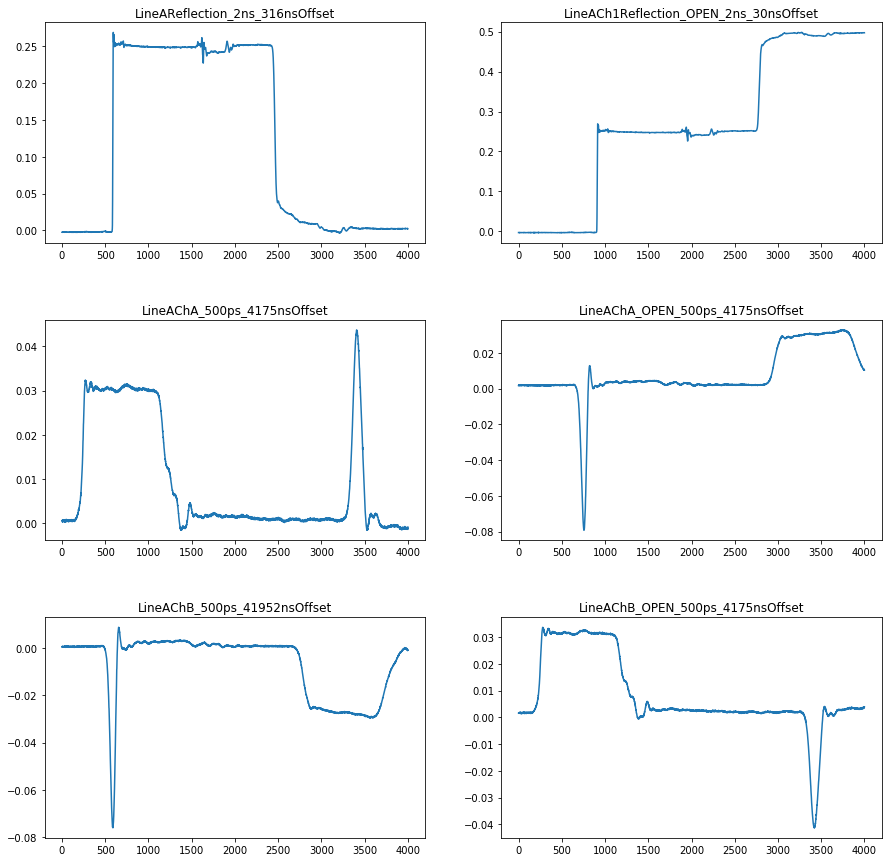

In [5]:
# Plot Overview LineA
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineAReflection_2ns_316nsOffset)
axs[0,1].plot(LineACh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineAChA_500ps_4175nsOffset)
axs[1,1].plot(LineAChA_OPEN_500ps_4175nsOffset)
axs[2,0].plot(LineAChB_500ps_41952nsOffset)
axs[2,1].plot(LineAChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineAReflection_2ns_316nsOffset')
axs[0,1].set_title('LineACh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineAChA_500ps_4175nsOffset')
axs[1,1].set_title('LineAChA_OPEN_500ps_4175nsOffset')
axs[2,0].set_title('LineAChB_500ps_41952nsOffset')
axs[2,1].set_title('LineAChB_OPEN_500ps_4175nsOffset');

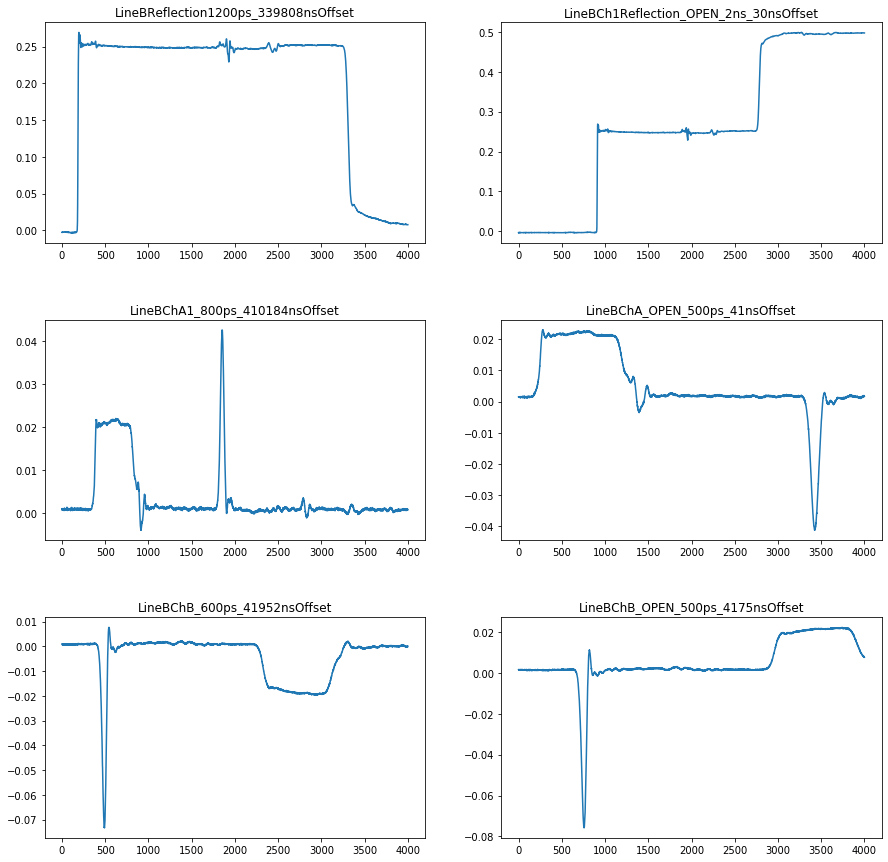

In [6]:
# Plot Overview LineB
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineBReflection1200ps_339808nsOffset)
axs[0,1].plot(LineBCh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineBChA1_800ps_410184nsOffset)
axs[1,1].plot(LineBChA_OPEN_500ps_41nsOffset)
axs[2,0].plot(LineBChB_600ps_41952nsOffset)
axs[2,1].plot(LineBChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineBReflection1200ps_339808nsOffset')
axs[0,1].set_title('LineBCh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineBChA1_800ps_410184nsOffset')
axs[1,1].set_title('LineBChA_OPEN_500ps_41nsOffset')
axs[2,0].set_title('LineBChB_600ps_41952nsOffset')
axs[2,1].set_title('LineBChB_OPEN_500ps_4175nsOffset');

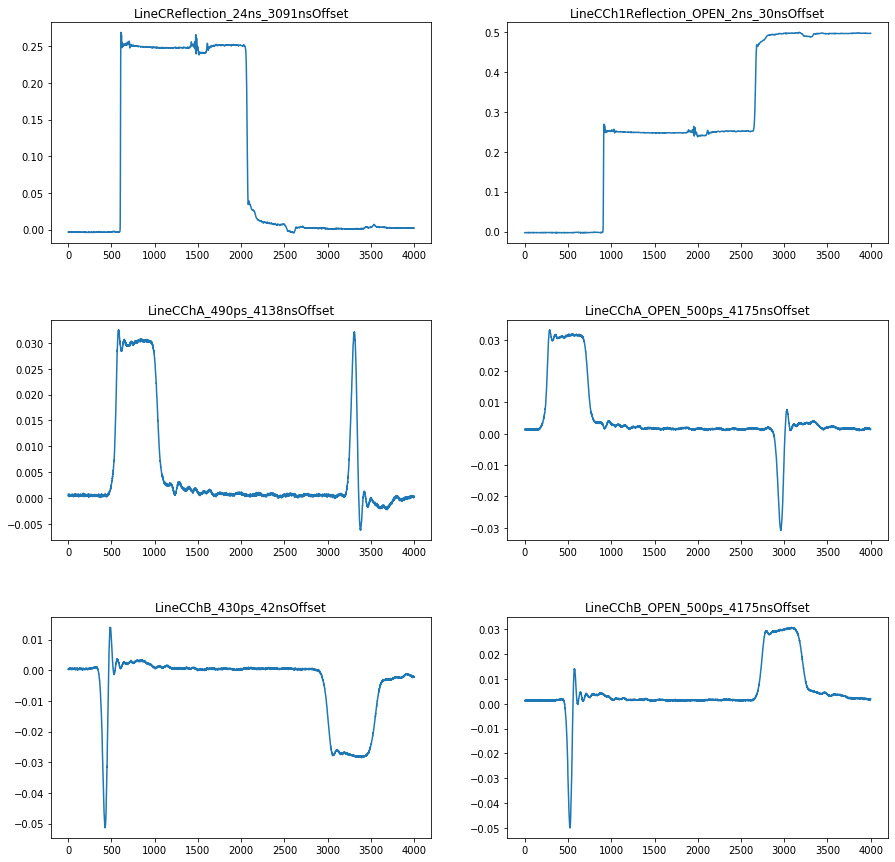

In [7]:
# Plot Overview LineC
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineCReflection_24ns_3091nsOffset)
axs[0,1].plot(LineCCh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineCChA_490ps_4138nsOffset)
axs[1,1].plot(LineCChA_OPEN_500ps_4175nsOffset)
axs[2,0].plot(LineCChB_430ps_42nsOffset)
axs[2,1].plot(LineCChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineCReflection_24ns_3091nsOffset')
axs[0,1].set_title('LineCCh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineCChA_490ps_4138nsOffset')
axs[1,1].set_title('LineCChA_OPEN_500ps_4175nsOffset')
axs[2,0].set_title('LineCChB_430ps_42nsOffset')
axs[2,1].set_title('LineCChB_OPEN_500ps_4175nsOffset');

In [8]:
np_arrays = [
    LineACh1Reflection_OPEN_2ns_30nsOffset,
    LineAChA_500ps_4175nsOffset,
    LineAChA_OPEN_500ps_4175nsOffset,
    LineAChB_500ps_41952nsOffset,
    LineAChB_OPEN_500ps_4175nsOffset,
    LineAReflection_2ns_316nsOffset,
    LineBCh1Reflection_OPEN_2ns_30nsOffset,
    LineBChA1_800ps_410184nsOffset,
    LineBChA_OPEN_500ps_41nsOffset,
    LineBChB_600ps_41952nsOffset,
    LineBChB_OPEN_500ps_4175nsOffset,
    LineBReflection1200ps_339808nsOffset,
    LineCCh1Reflection_OPEN_2ns_30nsOffset,
    LineCChA_490ps_4138nsOffset,
    LineCChA_OPEN_500ps_4175nsOffset,
    LineCChB_430ps_42nsOffset,
    LineCChB_OPEN_500ps_4175nsOffset,
    LineCReflection_24ns_3091nsOffset
]

![](images/CoupledTL_PhysicalDevice.png)

<hr>

### Constants

- Permittivity of free-space $= \epsilon_0 = 8.854 \cdot 10^{-12} F/m$
- Permeability of free-space $= \mu_0 = 4\pi \cdot 10^{-7} H/m$
- Impedance of free-space $= \eta_0 = 120\pi = 376.7\Omega$
- Velocity of light in free-space $= c = 2.998 \cdot 10^8 m/s$

### Helpful Equations

**Unknown Parameters**

$\begin{eqnarray}
C_1    &&  &=& && C_{1G} + C_{12}            &=& && C_2 \\
\\
Z_{01} &&  &=& && \sqrt{\frac{L_{11}}{C_1}}  &=& && \sqrt{\frac{L_{11}}{C_{1G}+C_{12}}}   &=& && Z_{02} \\
v_1    &&  &=& && \frac{1}{\sqrt{L_{11}C_1}} &=& && \frac{1}{\sqrt{L_{11}(C_{1G}+C_{12}}} &=& && v_2
\end{eqnarray}$


**Coupling Coefficient**

$\begin{eqnarray}
K_C &=& \frac{C_{12}}{C_{1G}+C_{12}} \\
\\
K_L &=& \frac{L_{12}}{L_{11}} &&(L_{22} = L_{11})
\end{eqnarray}$


**Signal Duration**

$\text{duration} = [V_{in}(t) - V_{in}(t-\frac{2d}{v_0}]$


**Analysis $K_C$ and $K_L$**

$\begin{eqnarray}
V_f &=& \frac{K_C-K_L}{2v_0} \cdot d \cdot \frac{\partial V_{in}}{\partial t} \\
\\
V_f &=& \frac{K_C-K_L}{2v_0} \cdot \frac{d}{t_{\text{rise}}} \cdot V_{\text{peak}}
    && \rightarrow V_{\text{peak}}: \text{peak value of } V_{in} \\
    \\
    & & *\text{If } V_{in} \text{ slope is linear,} \\
    \\
V_b &=& \frac{K_C-K_L}{4}[V_{in}(t) - V_{in}(t-\frac{2d}{v_0}]
    && \rightarrow V_0: \text{signal speed}
\end{eqnarray}$

**More Calculations**

$\begin{eqnarray}
\int_{0}^{x} V_f dt &=& \int_{0}^{x} [\frac{K_C-K_L}{2v_0} \cdot d \cdot 
    \frac{d V_{in}}{dt}] dt \\
    \\
                    &\approx& [\frac{K_C-K_L}{2v_0} \cdot d \cdot 
    \frac{V_{\text{peak}}}{t_{\text{rise}}}] \int_{0}^{t_{\text{rise}}} dt \\
    \\
                    &=& \frac{K_C-K_L}{2v_0} \cdot d \cdot V_{\text{peak}}
\end{eqnarray}$


$\begin{eqnarray}
\int_{0}^{x} V_b dt &=& \int_{0}^{x} \frac{K_C-K_L}{4}[V_{in}(t) - 
    V_{in}(t-\frac{2d}{v_0}]dt \\
    \\
                    &=& \frac{K_C-K_L}{2v_0} \cdot V_{\text{peak}} * \frac{2d}{v_0}
\end{eqnarray}$

**Test Boards**

| Coupled Lines            | A   | B  | C   |
|--------------------------|-----|----|-----|
| Coupled length *d* (cm)  | 10  | 10 | 5   |
| Line separation *s* (mm) | 0.5 | 1  | 0.5 |


### Procedue

**(1) Reflected, Backward and Forward Coupled Noise Measurements**

Steps:
- Connect the TDR input (Ch1) to the main line (start with the coupled line A) 
- Connect Ch A to the backward coupled path
- Connect Ch B to the forward coupled path
- Connect Cable 4 (short black cable) to the transmitted output

Data:
- Measure voltage with SHORT connected at the end of Cable 4
- Measure voltage with OPEN circuit connected at the end of Cable 4

*Repeat the same measurements for coupled lines B and C. Make sure to connect
four cables the same way*

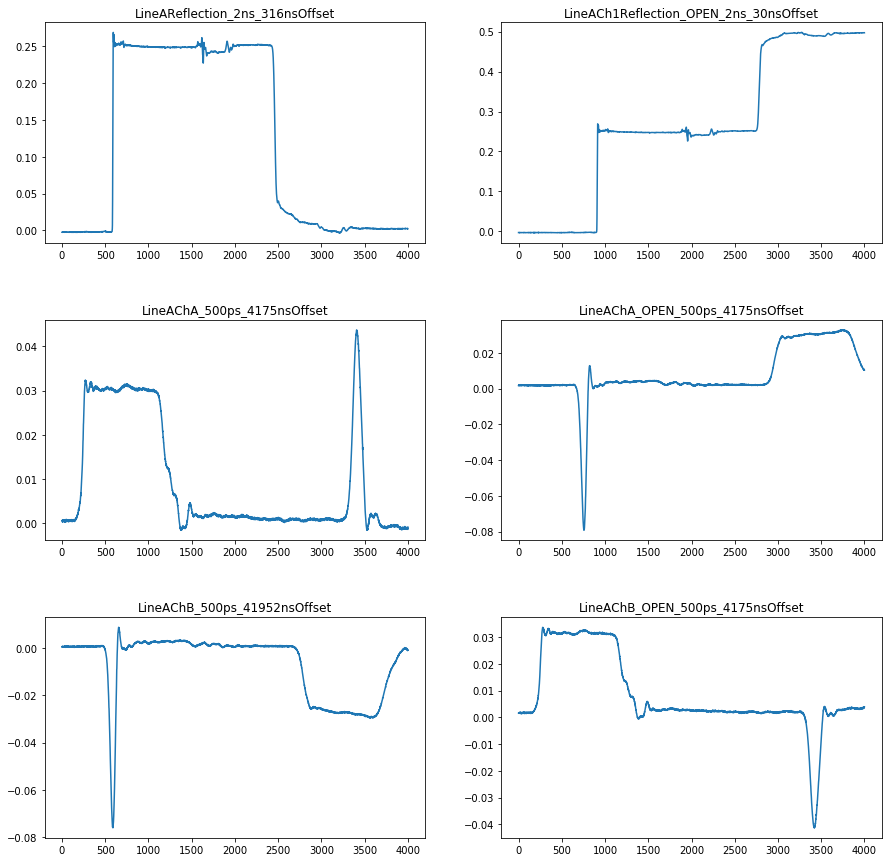

In [9]:
# Plot Overview LineA
#
fig,axs = plt.subplots(3,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(LineAReflection_2ns_316nsOffset)
axs[0,1].plot(LineACh1Reflection_OPEN_2ns_30nsOffset)
axs[1,0].plot(LineAChA_500ps_4175nsOffset)
axs[1,1].plot(LineAChA_OPEN_500ps_4175nsOffset)
axs[2,0].plot(LineAChB_500ps_41952nsOffset)
axs[2,1].plot(LineAChB_OPEN_500ps_4175nsOffset)

axs[0,0].set_title('LineAReflection_2ns_316nsOffset')
axs[0,1].set_title('LineACh1Reflection_OPEN_2ns_30nsOffset')
axs[1,0].set_title('LineAChA_500ps_4175nsOffset')
axs[1,1].set_title('LineAChA_OPEN_500ps_4175nsOffset')
axs[2,0].set_title('LineAChB_500ps_41952nsOffset')
axs[2,1].set_title('LineAChB_OPEN_500ps_4175nsOffset');

Use Ch 1 data (reflection) for estimating the characteristics impedance of the coupled lines.

In [10]:
def RoundNonZeroDecimal(num, place, rnd='ceil'):
    # Requires numpy library
    # Examples:
    #   RoundNonZeroDecimal(0.0004512,1,'floor') -> 0.0045
    #   RoundNonZeroDecimal(0.0004512,1,'ceil') -> 0.0046
    #
    tmp = num # implement so that num can be array
    mag = int(0)
    
    if rnd=='ceil':
        while(abs(tmp)<1):
            tmp*=10
            mag+=1
        for i in range(place):
            tmp*=10
            mag+=1
        return np.ceil([tmp])[0]/(10**(mag)) 
    
    if rnd=='floor':
        while(abs(tmp)<1):
            tmp*=10
            mag+=1
        for i in range(place):
            tmp*=10
            mag+=1
        return int(np.floor([tmp])[0])/(10**(mag))
    
    else:
        raise ValueError('Invalid argument')
        return None

In [47]:
# Find Rise Time

def RiseTime(np_arr):
    # Find the rise time as defined: 10%-90% of rising slope
    # Returns the indexes x0,x1 corresponding to the 10%,90% values

    x0,x1 = None,None
    
    # Final State Value: Median of final 10% elements
    fsv = np.median(np_arr[-int(0.1*len(np_arr)):])

    # 10% value
    V0 = 0.1*fsv

    # 90% value
    V1 = 0.9*fsv

    # start
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V0,place,'floor')
            ceil = RoundNonZeroDecimal(V0,place,'ceil')
            x0 = np.where(np_arr<floor)[0][-1]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 10% value of final state value: {fsv}')
                break
            continue
        break

    #end
    place=4
    while(1):
        try:
            floor = RoundNonZeroDecimal(V1,place,'floor')
            ceil = RoundNonZeroDecimal(V1,place,'ceil')
            x1 = np.where(np_arr>ceil)[0][0]
        except Exception as e:
            place-=1
            if place<=-1:
                raise ValueError(f'Unable to find 90% value of final state value: {fsv}')
                break
            continue
        break
    
    return x0,x1

end


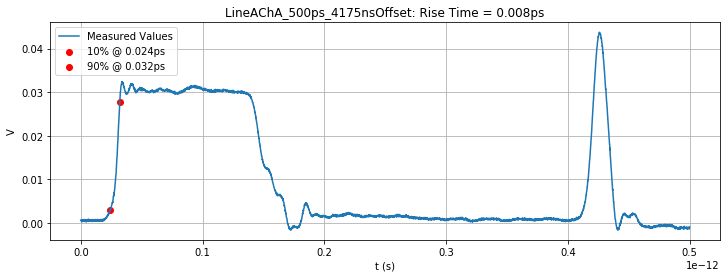

In [61]:
# Measured Values: Part2_calib_ch2_Thu
#
x0,x1 = RiseTime(LineAChA_500ps_4175nsOffset[:1000])
L = len(LineAChA_500ps_4175nsOffset)
X = np.argmax(LineAChA_500ps_4175nsOffset)

fig,ax = plt.subplots(figsize=(12,4))
x,res = np.linspace(0,0.5*10**(-12),len(LineAChA_500ps_4175nsOffset),endpoint=False,retstep=True)
Ures = res*10**14

# Plot
ax.plot(x,LineAChA_500ps_4175nsOffset,label='Measured Values')
#ax.scatter(X*res,max(LineAChA_500ps_4175nsOffset),
#           color='blue',label='Max Value')
ax.scatter(x0*res,LineAChA_500ps_4175nsOffset[x0],
           color='red',label=f'10% @ {round(x0*Ures,1)/100}ps')
ax.scatter(x1*res,LineAChA_500ps_4175nsOffset[x1],
           color='red',label=f'90% @ {round(x1*Ures,1)/100}ps')
rt = round((x1*Ures)-(x0*Ures),1)/100

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-12,-12))
ax.set_title(f'LineAChA_500ps_4175nsOffset: Rise Time = {rt}ps')
ax.set_xlabel('t (s)')
ax.set_ylabel('V')
plt.grid(True)
plt.legend();

In [78]:
x,res = np.linspace(0,0.5*10**(-12),L,endpoint=False,retstep=True)
LineAChA_500ps_4175nsOffset[:]

array([[ 0.000563],
       [ 0.00052 ],
       [ 0.000473],
       ...,
       [-0.00108 ],
       [-0.001421],
       [-0.000891]])

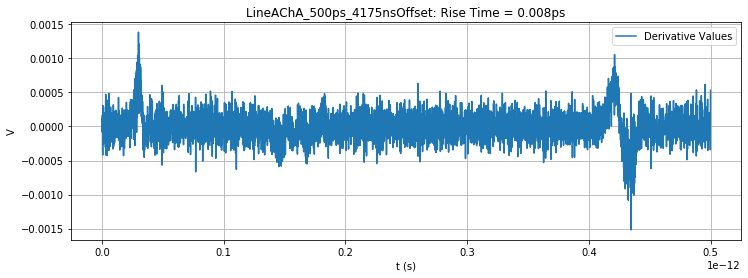

In [83]:
# Measured Values: Part2_calib_ch2_Thu
#
L = len(LineAChA_500ps_4175nsOffset)
X = np.argmax(LineAChA_500ps_4175nsOffset)

fig,ax = plt.subplots(figsize=(12,4))
x,res = np.linspace(0,0.5*10**(-12),L,endpoint=False,retstep=True)
Ures = res*10**14

# Plot
ax.plot(x[0:-1],np.ediff1d(LineAChA_500ps_4175nsOffset),label='Derivative Values')


# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-12,-12))
ax.set_title(f'LineAChA_500ps_4175nsOffset: Rise Time = {rt}ps')
ax.set_xlabel('t (s)')
ax.set_ylabel('V')
plt.grid(True)
plt.legend();